Import all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the Data in 'train.parquet'
df = pd.read_parquet('train.parquet',engine='pyarrow')
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [3]:
#Since we are concerned only with the patterns shown by 'TARGET DRUG', we shall only consider such entries.
df = df[df['Incident']=='TARGET DRUG']
df['Date'] = pd.to_datetime(df['Date']) #Convert string to panda datetime.
df = df.sort_values(['Patient-Uid','Date']) #Sort data
df = df.reset_index(drop=True)
df

C:\Users\Krishna Chaitanya N\AppData\Local\Temp\ipykernel_23528\3680550398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date']) #Convert string to panda datetime.


,Patient-Uid,Date,Incident
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG
3,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24,TARGET DRUG
4,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-05-17,TARGET DRUG
...,...,...,...
67213,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG
67214,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG
67215,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG
67216,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG


In [4]:
#Since, we are interested in the monthly patterns,consider:
df['Month'] = df['Date'].dt.to_period('M')
df

,Patient-Uid,Date,Incident,Month
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG,2020-07
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG,2020-08
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,2020-09
3,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24,TARGET DRUG,2018-04
4,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-05-17,TARGET DRUG,2018-05
...,...,...,...,...
67213,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG,2020-08
67214,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG,2020-07
67215,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG,2020-06
67216,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG,2020-07


In [7]:
#Since, we are looking for patterns in the frequency of dosage of 'TARGET DRUG', consider a variable showing the consecutive difference
#in days between two dosages per patient.
df['DateDiff'] = df.groupby('Patient-Uid')['Date'].diff().dt.days
df['DateDiff'] = df['DateDiff'].replace(np.nan,0) #nan values may occur at the first date per patient.
df

,Patient-Uid,Date,Incident,Month,DateDiff
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG,2020-07,0.0
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG,2020-08,28.0
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,2020-09,28.0
3,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24,TARGET DRUG,2018-04,0.0
4,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-05-17,TARGET DRUG,2018-05,23.0
...,...,...,...,...,...
67213,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG,2020-08,55.0
67214,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG,2020-07,0.0
67215,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG,2020-06,0.0
67216,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG,2020-07,21.0


We see that the Column of 'DateDiff' starts from 0 for each unique patient. (Note: We have already sorted our dataset based on patient and date of admittance)

For the purpose of finding clusters of people showing similar patterns, I shall use the K-Means Clustering Algorithm to analyse such changes.

In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=5) #split patterns into 5 clusters
#To detect patterns we shall give the model the column of 'DateDiff' as input and store the predicted result as df['Cluster']
input = df['DateDiff'].values.reshape(-1,1) #2D Array is required.
df['Cluster'] = model.fit_predict(input)

In [10]:
df

,Patient-Uid,Date,Incident,Month,DateDiff,Cluster
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG,2020-07,0.0,2
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG,2020-08,28.0,2
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,2020-09,28.0,2
3,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24,TARGET DRUG,2018-04,0.0,2
4,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-05-17,TARGET DRUG,2018-05,23.0,2
...,...,...,...,...,...,...
67213,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG,2020-08,55.0,0
67214,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG,2020-07,0.0,2
67215,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG,2020-06,0.0,2
67216,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG,2020-07,21.0,2


In [11]:
df.Cluster.unique()

array([2, 0, 3, 4, 1])

Now, Let's attempt to visually analyse these cluster patterns shown with Duration (Month) as given below:

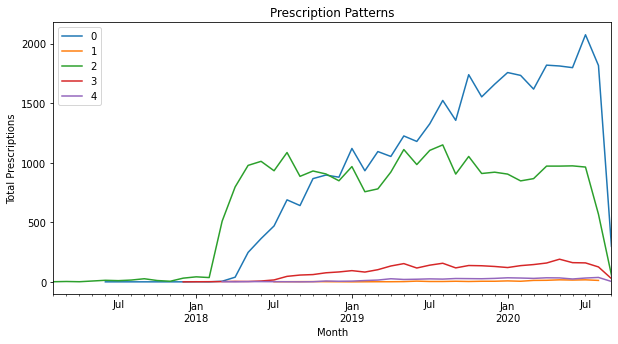

In [19]:
plt.figure(figsize=(10,5)) 
for c in range(5): #5 clusters
    data = df.loc[df['Cluster']==c] #Data Frame for each cluster
    prescripts = data.groupby('Month').size() #Count of patients in each month
    prescripts.plot(label = c)

plt.xlabel('Month')
plt.ylabel('Total Prescriptions')
plt.title('Prescription Patterns')
plt.legend(loc='best')
plt.show()

In [47]:
len(df.Cluster.values)

67218

In [49]:
len(df.loc[(df['Cluster']==1) | (df['Cluster']==4)])/len(df.Cluster.values)*100

1.0726293552322295

In [50]:
len(df.loc[df['Cluster']==3])/len(df.Cluster.values)*100

4.614835311970008

In [51]:
len(df.loc[df['Cluster']==0])/len(df.Cluster.values)*100

52.95902883156297

In [52]:
len(df.loc[df['Cluster']==2])/len(df.Cluster.values)*100

41.35350650123479

We see that Clusters 1 and 4 are nearly similar with not much increase in the usage of TARGET DRUG and these together amount to only 1.07% of the total patients taking up the drug. These are the ones which have merely used the drug and dropped before its total duration (1 year).

The Cluster 3 has slightly more patients who have gone upto a 100 prescriptions in total and these amass to be close to 4.61% of the total count. We see that the peak of prescriptions is around that 2019-2020 year and we can take a pretty solid guess that this was because of the Covid First Wave that was taking place then.


Now,Clusters 0 and 2 together consist of nearly 95% of the total patient count (around 67000 in total) and we see that even this cluster didn't have much usage of TARGET DRUG till 2018 and I guess this was because the drug was still under observation and research and was not completely accessed by the patients. We see the ultimate peak months around the same time period 2019-2020 which again comes back to our discussion on how this period was the first outbreak of Covid. 

An interesting observation is that though both Clusters 0 and 2 have roughly the same amount of patients, one sees a clear shift in the dosage patterns within the two where the ones under Cluster 0 reached a sky high peak of more than 2000 total prescriptions, the ones under Cluster 2 remained more around the average of 1000 prescriptions. This shows that the effect of TARGET DRUG was felt on different kinds of people in different ways. In some cases, it proved to be more effective hence the increase in the dosage value i.e. the ones under Cluster 0. They reacted better to the possible side-effects of the drug. One needs much more data to comprehend the individual health condition of each patient after the dosage of the drug.

As predicted though, the total prescriptions count starts falling down around July of 2020. This was the Summer Break where the First Wave of Covid cooled down. It was in this time that the public had come out of quarantine and schools were opened and hospitals started letting go of the patients. Either way, the drug dosage count used by the patients comes drastically down and is the same across all clusters.